# **ASSIGNMENT 3**

Energy balance:  Accumulation =  In - Out + Generation

- For inner Cylinder
$ \frac{dT_1}{dt} = \frac{m_1*C_{p1}*(T_1(i-1) - T_1(i)) + U*2\pi r_1*dx*(T_2(i) - T_1(i))}{\rho_{1}*C_{p1}*A_1*dx} $

- For Outer cylinder
$ \frac{dT_2}{dt} = \frac{m_2*C_{p2}*(T_2(i-1) - T_2(i)) + U*2\pi r_1*dx*(T_2(i) - T_1(i))}{\rho_{2}*C_{p2}*A_2*dx} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [2]:
l = 60 #length of pipe
r1 = 0.1 # inner radius
r2 = 0.15 # outer radius
n = 100 # number of internal points (take n = 500 also)
pi = 3.14 
a1 = pi*np.square(r1) # area of cylinder 1
a2 = pi*(np.square(r2) - np.square(r1)) # area of cylinder 2
m1 = 3 # mass flow rate (fluid 1)
cp1 = 4180 # heat capacity of water (fluid 1)
d1 = 1000 # density of water (fluid 2)
m2 = 5 # mass flow rate (fluid 2)
cp2 = 4180 # heat capacity of water (fluid 2) 
d2 = 1000 # density of water (fluid 2)

dx = l/n
t_final = 1000
dt = 1 
 
t0 = 300 # initial temperature of fluid
t1i = 400 # inlet temperature of fluid 1
t2i = 800 # inlet temperature of fluid 2
U = 340 # overall heat transfer coefficient

x = np.linspace(dx/2,l-dx/2,n) # take evenly spaced numbers array from dx/2 to l-dx/2 of size n
T1 = np.ones(n)*t0 # create array of size n with all value = t0
T2 = np.ones(n)*t0
dT1_dt = np.zeros(n) # create array of zeros of size n
dT2_dt = np.zeros(n)
Tin = np.zeros((t_final,n))
Tout = np.zeros((t_final,n))
t = np.arange(0,t_final,dt)



In [3]:
for i in range(1,len(t)):
    dT1_dt[1:n] = ( m1*cp1*(T1[0:n-1]-T1[1:n])+ U*2*pi*r1*dx*(T2[1:n]-T1[1:n]) ) / ( d1*cp1*dx*a1 )
    dT1_dt[0] = ( m1*cp1*(t1i-T1[0])+ U*2*pi*r1*dx*(T2[0]-T1[0]) ) / ( d1*cp1*dx*a1 )
    dT2_dt[1:n] = ( m2*cp2*(T2[0:n-1]-T2[1:n])- U*2*pi*r1*dx*(T2[1:n]-T1[1:n]) ) / ( d2*cp2*dx*a2 ) 
    dT2_dt[0] = ( m2*cp2*(t2i-T2[0])- U*2*pi*r1*dx*(T2[0]-T1[0]) ) / ( d2*cp2*dx*a2 )
    T1 = T1+dT1_dt*dt
    T2 = T2+dT2_dt*dt
    Tin[i,:] = T1
    Tout[i,:] = T2

In [4]:
def plotheatmap(Tin,Tout):
    plt.clf()
    plt.plot(x,Tin,label="Inner Temperature")
    plt.plot(x,Tout,label="Outer Tempearture")
    plt.xlabel('Distance(m)') 
    plt.ylabel('Temperature(k)')
    plt.axis([0,l,0,900])
    return plt

MovieWriter ffmpeg unavailable; using Pillow instead.


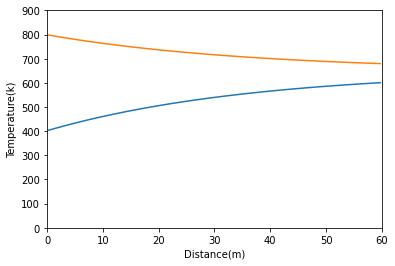

In [5]:
def animate(j):
    plotheatmap(Tin[j,:],Tout[j,:])
anim = animation.FuncAnimation(plt.figure(), animate, interval=dt, frames=t_final, repeat=False)
anim.save("answer.gif")
